# COMP47700-Speech and Audio Project
## Team Members: Zairui Zhang and Ao Peng
Student Number: 19209905, 20202688
### Introduction
This project aims to significantly enhance recognition techniques in different noisy environments, which are a very common hindrance in practical life settings. One reputable source that the project will refer to is the **NOIZEUS dataset**, , simulating common noisy conditions to seek new ways to enhance clarity and thereby strengthening reliability in automated transcriptions. The data used in this project was taken from [NOIZEUS Dataset](https://ecs.utdallas.edu/loizou/speech/noizeus/), available online.

### Project Objectives and Strategy:
1. **Problem Definition and Theoretical Approach**: It defines the problem of speech recognition in noisy environments and proposes an advanced multi-faceted approach to reducing noise, combined with the latest speech-to-text technologies like Hugging Face ASR models. This project aims to build systems that are capable of using existing knowledge in the area of speech processing and investigating novel hybrids of techniques. 
2. **Data Analysis and Algorithm Application**: Analysis of the **NOIZEUS dataset** has been quite extensive so that by setting it up, it is possible to do a more or less concise delimitation and definition of the different types of noise based on their influence on speech recognition. We use algorithms like Spectral Subtraction for Noise Reduction and transcription by cutting-edge machine learning models, ensuring it's implemented from theory with rigor and practicality.
3. **Coding Quality and Use of Software Libraries**: Our implementation holds high esteem toward the three views of modularity, reusability, and maintainability as far as coding practices are concerned. For instance, in our software architecture, we gave due consideration to efficiency and scalability by using robust libraries such as TensorFlow, Librosa, and Hugging Face's Transformers.
4. **Results and Interpretation**: We highlight the effectiveness of our approach through certain metrics quantitatively: Word Error Rate (WER). The detailed analysis of the results is presented here, which includes a discussion for the efficiency of approaches used for noise reduction and the accuracy of the speech to text conversion for all categories of noise conditions.

### Comprehensive Workflow:
The project is structured into several key phases:
1. **Noise Reduction**: Techniques such as spectral subtraction, are applied to reduce the noise and partially cancel frequency content from the audio signals. This is a very important step towards improving the quality of the original audio data.
2. **ASR**: The actual transcription work from speech to text will be done using huggingface models. This phase is targeted at the maximum clarity and truthfulness in transcriptions between the speech text.
3. **Evaluation**: We make a deep evaluation of our model performance with well-implemented metrics, and among them is WER, which clearly tells the improved number and focuses on the right spot of enhancement.

### Step 1: Noise Reduction
We use spectral subtraction and other filters to target the background noise of common environmental noise sources such as at the airport, traffic, and restaurant sounds that are relatively present in the **NOIZEUS dataset**.

In [1]:
import tensorflow as tf
import os
import librosa
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from IPython.display import Audio
import pandas as pd
import librosa.display

/Users/aopeng/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
def normalize_audio(audio):
    """
    Normalize an audio signal to the range [-1, 1].
    
    Parameters:
        audio (np.array): The audio data as a numpy array.
    
    Returns:
        np.array: The normalized audio data.
    """
    max_value = np.max(np.abs(audio))
    if max_value > 0:
        audio = audio / max_value
    return audio

In [3]:
def detect_silence_and_trim(audio, top_db=20):
    """
    Remove silence from an audio signal using a top decibel threshold for silence.
    
    Parameters:
        audio (np.array): The audio data to process.
        top_db (int): The threshold in decibels below which a signal is considered silent.
    
    Returns:
        np.array: The audio data with silence removed.
    """
    non_silent_audio, _ = librosa.effects.trim(audio, top_db=top_db)
    return non_silent_audio

In [4]:
def plot_waveforms(original_audio, normalized_audio, trimmed_audio, sr):
    """
    Plot the waveforms of original, normalized, and trimmed audio.
    
    Parameters:
        original_audio (np.array): The original audio data.
        normalized_audio (np.array): The normalized audio data.
        trimmed_audio (np.array): The audio data with silence removed.
        sr (int): Sample rate of the audio data.
    """
    plt.figure(figsize=(18, 6))
    titles = ['Original Audio', 'Normalized Audio', 'Silence-Removed Audio']
    audios = [original_audio, normalized_audio, trimmed_audio]
    for i, (audio, title) in enumerate(zip(audios, titles)):
        plt.subplot(1, 3, i+1)
        librosa.display.waveshow(audio, sr=sr, alpha=0.5)
        plt.title(title)
        plt.ylim([-1, 1])
    plt.show()

Plotting for airport:


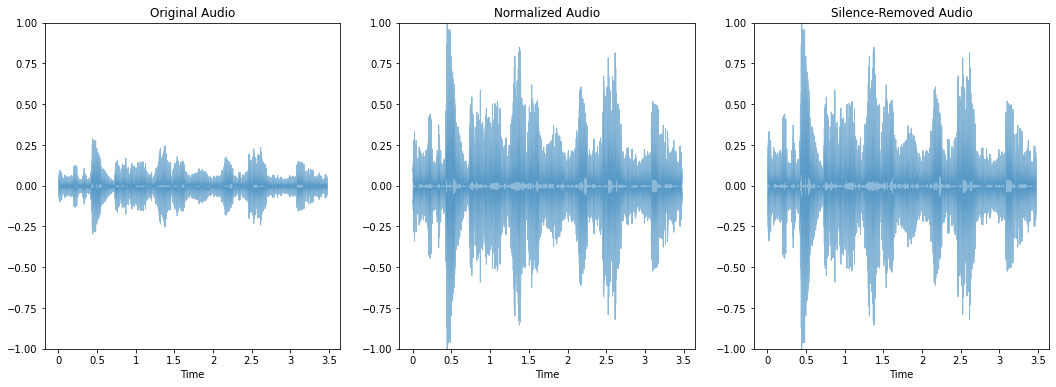

Playing audio for airport:


Plotting for babble:


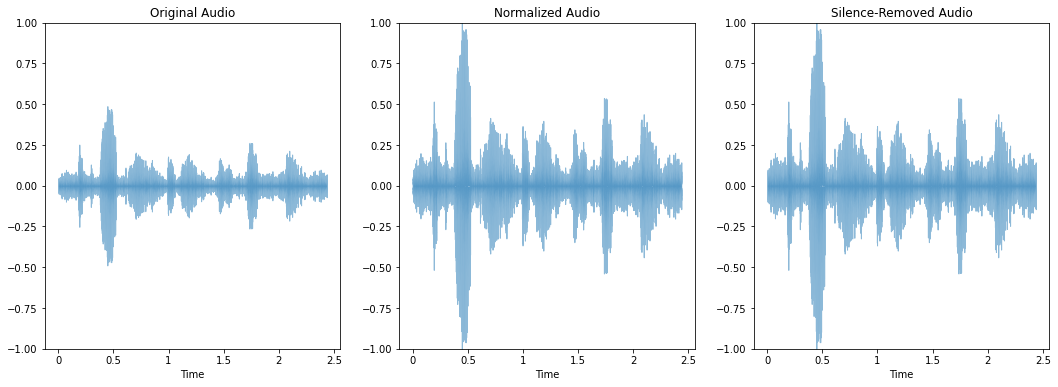

Playing audio for babble:


Plotting for car:


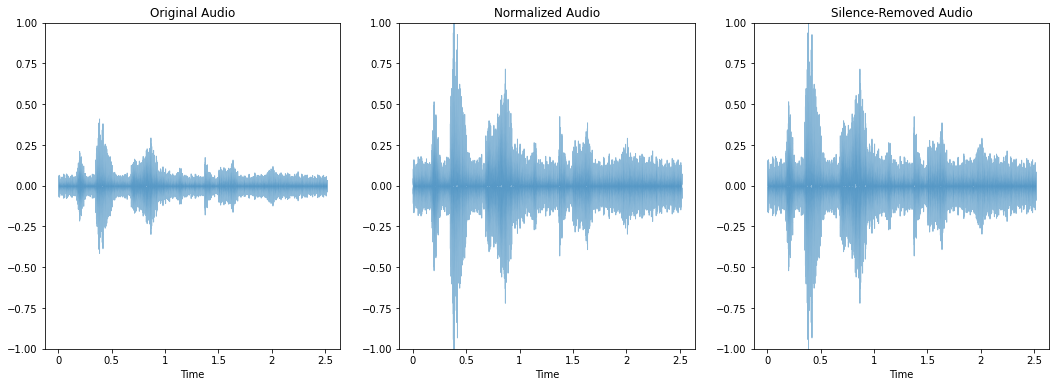

Playing audio for car:


Plotting for exhibition:


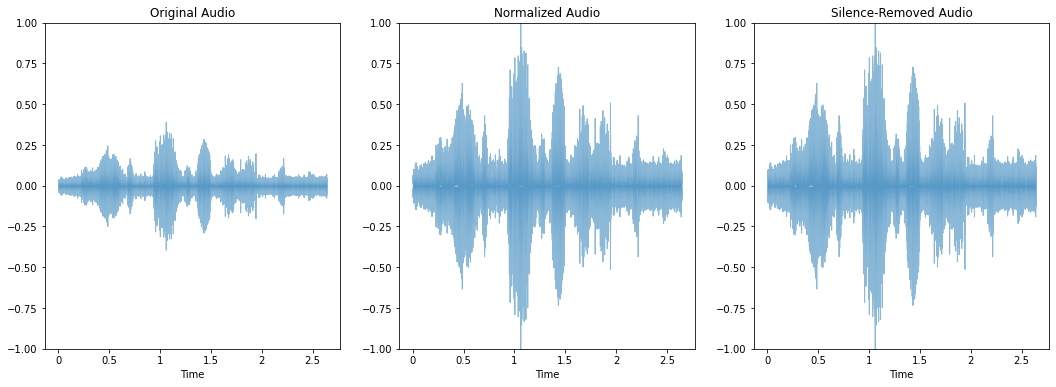

Playing audio for exhibition:


Plotting for restaurant:


Playing audio for restaurant:


Plotting for station:


Playing audio for station:


Plotting for street:


Playing audio for street:


Plotting for train:


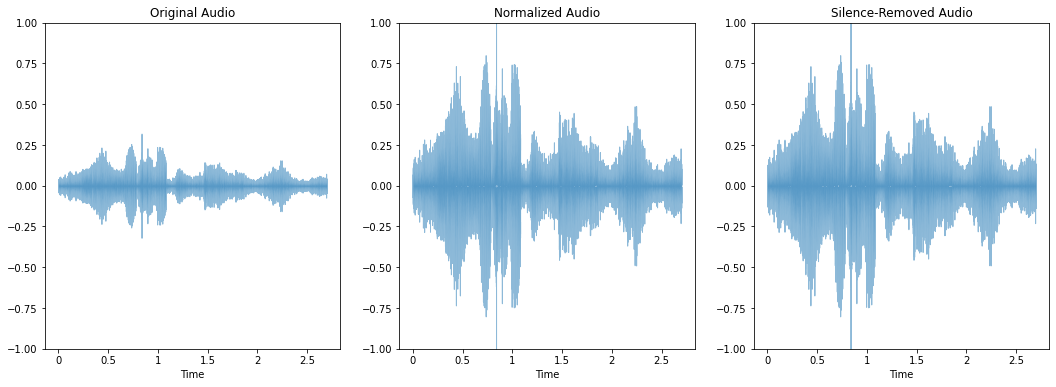

Playing audio for train:


In [5]:
# Set up directories and process files
root_directory = 'NOIZEUS'
noise_types = ['airport', 'babble', 'car', 'exhibition', 'restaurant', 'station', 'street', 'train']
db_level = '5'  # Use the same dB level for simplicity

# Process a single example for each noise type
for noise_type in noise_types:
    input_directory = os.path.join(root_directory, f"{noise_type}_{db_level}dB", "wav")
    files = [f for f in os.listdir(input_directory) if f.endswith('.wav')]
    if files:
        example_filename = files[0]  # Select the first file for simplicity
        example_filepath = os.path.join(input_directory, example_filename)
        
        # Load the audio file
        original_audio, sr = librosa.load(example_filepath, sr=None)
        
        # Normalize the audio file
        normalized_audio = normalize_audio(original_audio)
        
        # Remove silence from the normalized audio
        trimmed_audio = detect_silence_and_trim(normalized_audio)
        
        # Plot original, normalized, and silence-removed audio waveforms
        print(f"Plotting for {noise_type}:")
        plot_waveforms(original_audio, normalized_audio, trimmed_audio, sr)
        
        # Display audio players
        print(f"Playing audio for {noise_type}:")
        display(Audio(data=original_audio, rate=sr, autoplay=False))  # Original
        display(Audio(data=normalized_audio, rate=sr, autoplay=False))  # Normalized
        display(Audio(data=trimmed_audio, rate=sr, autoplay=False))  # Trimmed

In [6]:
def vad(audio, sr, frame_length=0.02, hop_length=0.01, threshold=0.01):
    """
    Perform voice activity detection (VAD) to differentiate between speech and non-speech parts of an audio signal.
    
    Parameters:
        audio (np.array): Audio data.
        sr (int): Sampling rate of the audio.
        frame_length (float): Length of each frame in seconds.
        hop_length (float): Hop length between frames in seconds.
        threshold (float): Energy threshold for deciding if a frame contains speech.
    
    Returns:
        np.array: Boolean array where True indicates speech presence.
    """
    frame_samples = int(frame_length * sr)
    hop_samples = int(hop_length * sr)
    energy = np.array([
        np.sum(np.square(audio[i:i+frame_samples]))
        for i in range(0, len(audio) - frame_samples, hop_samples)
    ])
    return energy > threshold

In [7]:
def adaptive_noise_estimation(audio, sr, frame_length=2048, hop_length=512, smoothing_frames=10):
    """
    Estimate the noise spectrum of an audio signal using non-speech frames identified by VAD.
    
    Parameters:
        audio (np.array): Audio data.
        sr (int): Sampling rate of the audio.
        frame_length (int): Length of each frame in samples.
        hop_length (int): Hop length between frames in samples.
        smoothing_frames (int): Number of frames used for smoothing the noise spectrum.
    
    Returns:
        np.array: Estimated noise spectrum.
    """
    is_speech = vad(audio, sr, frame_length=frame_length/sr, hop_length=hop_length/sr)
    frames = librosa.util.frame(audio, frame_length=frame_length, hop_length=hop_length)
    noise_frames = frames[:, ~is_speech[:frames.shape[1]]]
    if noise_frames.size == 0:
        return np.ones((int(frame_length // 2 + 1), 1)) * 0.001

    noise_stft = librosa.stft(noise_frames.flatten(), n_fft=frame_length, hop_length=hop_length)
    noise_spectrum = np.mean(np.abs(noise_stft), axis=1, keepdims=True)
    if noise_spectrum.shape[1] < 2 * smoothing_frames + 1:
        return noise_spectrum

    smoothed_spectrum = np.copy(noise_spectrum)
    for i in range(smoothing_frames, noise_spectrum.shape[1] - smoothing_frames):
        smoothed_spectrum[:, i] = np.mean(noise_spectrum[:, i-smoothing_frames:i+smoothing_frames+1], axis=1)

    return np.mean(smoothed_spectrum, axis=1, keepdims=True)

In [8]:
def spectral_subtraction(audio, sr, over_subtraction_factor=1.2, spectral_floor=0.05):
    """
    Apply spectral subtraction method to reduce noise in an audio signal.
    
    Parameters:
        audio (np.array): Audio data.
        sr (int): Sampling rate of the audio.
        over_subtraction_factor (float): Factor for how much noise to subtract.
        spectral_floor (float): Minimum allowed spectral value to avoid artifacts.
    
    Returns:
        np.array: Noise-reduced audio data.
    """
    n_fft = 2048
    hop_length = 512
    S_full, phase = librosa.magphase(librosa.stft(audio, n_fft=n_fft, hop_length=hop_length))
    noise_spectrum = adaptive_noise_estimation(audio, sr)
    S_clean = np.maximum(S_full - over_subtraction_factor * noise_spectrum, spectral_floor)
    y_clean = librosa.istft(S_clean * phase, hop_length=hop_length)
    return y_clean


In [9]:
def pre_emphasis_filter(audio, pre_emphasis=0.97):
    """
    Apply a pre-emphasis filter to an audio signal to increase the high-frequency components.
    
    Parameters:
        audio (np.array): Audio data.
        pre_emphasis (float): Pre-emphasis coefficient.
    
    Returns:
        np.array: Pre-emphasized audio data.
    """
    return np.append(audio[0], audio[1:] - pre_emphasis * audio[:-1])

In [10]:
def plot_waveforms(original_audio, noise_reduced_audio, pre_emphasized_audio, sr):
    """
    Plot the waveforms of the original audio, noise-reduced audio, and pre-emphasized audio.
    
    Parameters:
        original_audio (np.array): The original raw audio data.
        noise_reduced_audio (np.array): The audio data after applying noise reduction techniques.
        pre_emphasized_audio (np.array): The audio data after applying a pre-emphasis filter to enhance high frequencies.
        sr (int): Sampling rate of the audio data, used to correctly scale the time axis in plots.
    
    Displays:
        This function generates a matplotlib plot with three subplots showing the waveforms of the
        original, noise-reduced, and pre-emphasized audio signals.
    """
    plt.figure(figsize=(18, 6))
    titles = ['Original Audio', 'Noise Reduced Audio', 'Pre Emphasized Audio']
    audios = [original_audio, noise_reduced_audio, pre_emphasized_audio]
    for i, (audio, title) in enumerate(zip(audios, titles)):
        plt.subplot(1, 3, i+1)
        librosa.display.waveshow(audio, sr=sr, alpha=0.5)
        plt.title(title)
        plt.ylim([-1, 1])
    plt.show()

Plotting for airport:


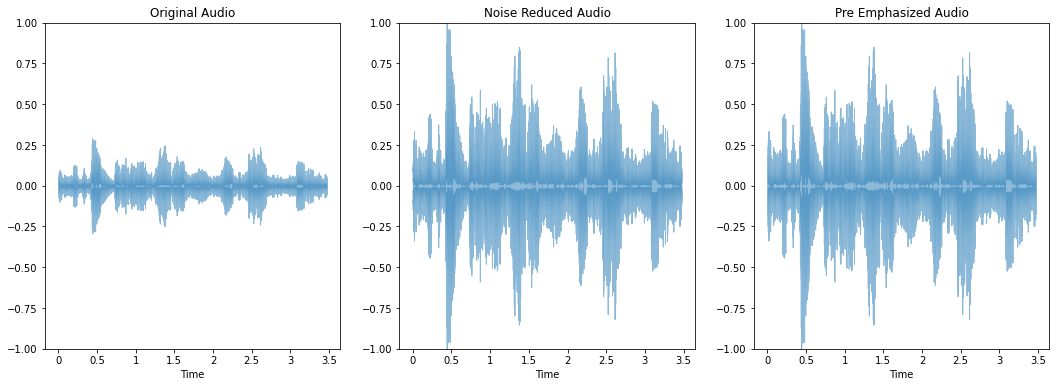

Playing audio for airport:


Plotting for babble:


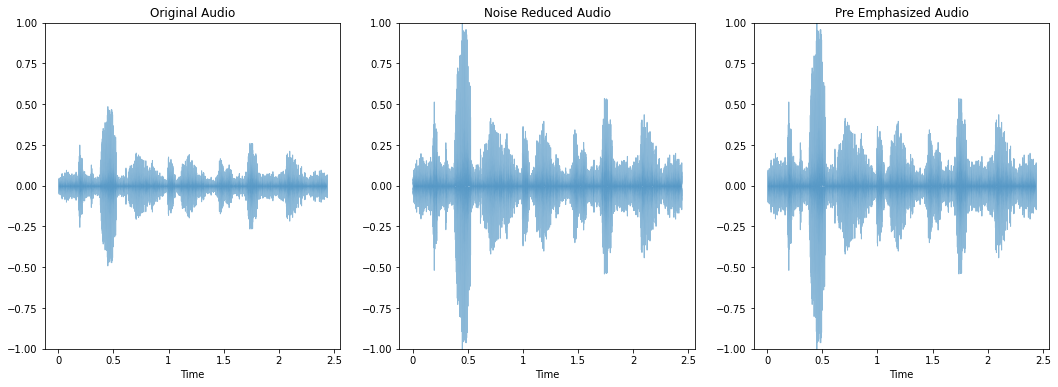

Playing audio for babble:


Plotting for car:


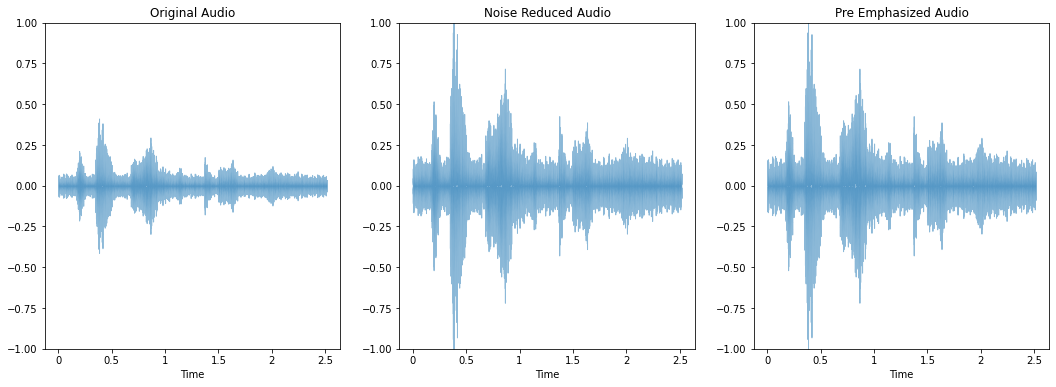

Playing audio for car:


Plotting for exhibition:


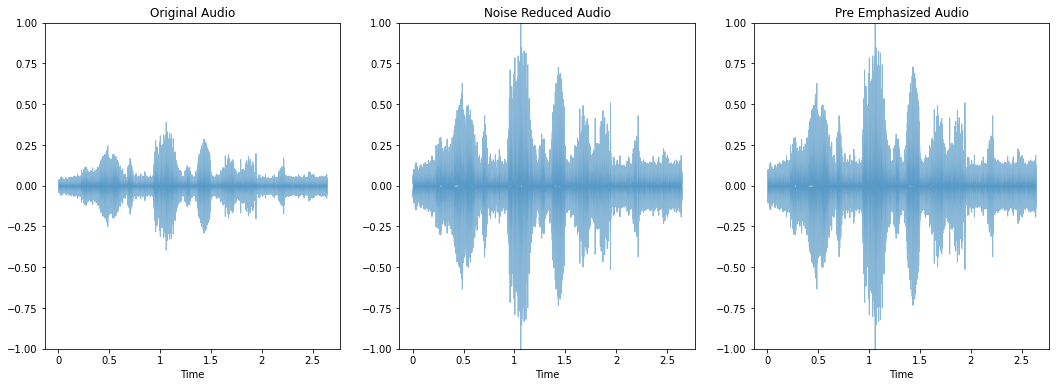

Playing audio for exhibition:


Plotting for restaurant:


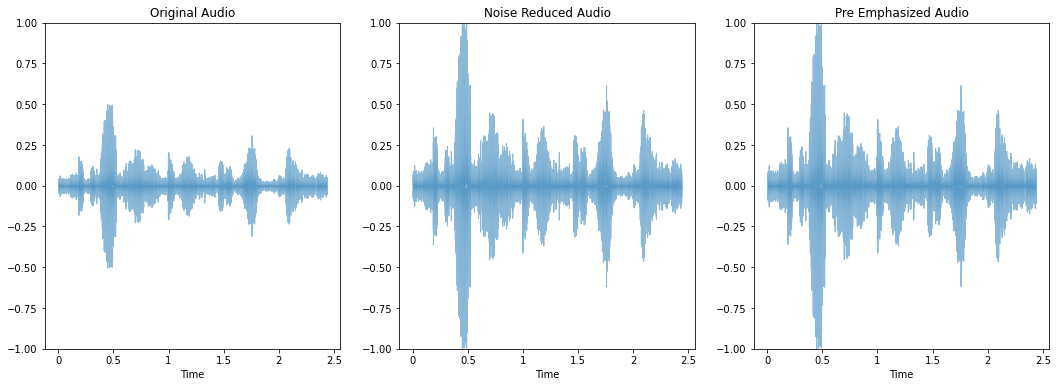

Playing audio for restaurant:


Plotting for station:


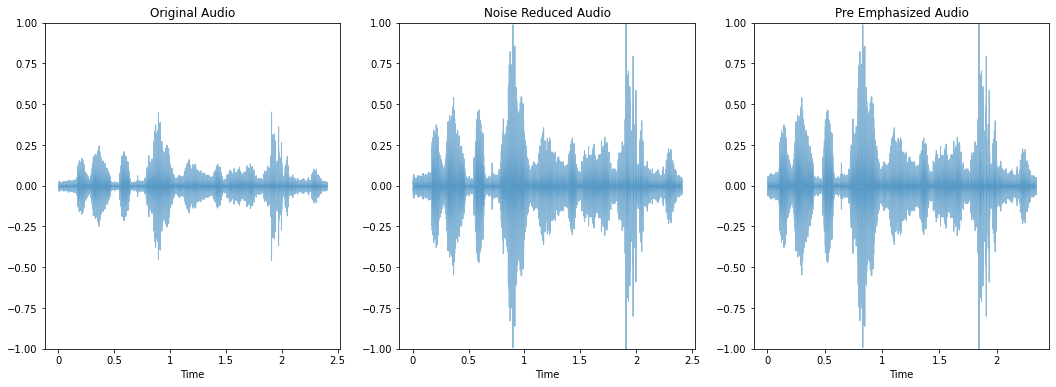

Playing audio for station:


Plotting for street:


Playing audio for street:


Plotting for train:


Playing audio for train:


In [12]:
root_directory = 'NOIZEUS'
noise_types = ['airport', 'babble', 'car', 'exhibition', 'restaurant', 'station', 'street', 'train']
db_level = '5'  # Use the same dB level for simplicity

for noise_type in noise_types:
    input_directory = os.path.join(root_directory, f"{noise_type}_{db_level}dB", "wav")
    files = [f for f in os.listdir(input_directory) if f.endswith('.wav')]
    if files:
        example_filename = files[0]  # Select the first file for simplicity
        example_filepath = os.path.join(input_directory, example_filename)

        # Load the audio file
        original_audio, sr = librosa.load(example_filepath, sr=None)

        # Normalize the audio
        normalized_audio = normalize_audio(original_audio)

        # Remove silence
        trimmed_audio = detect_silence_and_trim(normalized_audio, top_db=20)

        # Perform voice activity detection
        vad_result = vad(trimmed_audio, sr)

        # Estimate noise
        noise_estimated = adaptive_noise_estimation(trimmed_audio, sr)

        # Apply spectral subtraction
        noise_reduced_audio = spectral_subtraction(trimmed_audio, sr)

        # Apply pre-emphasis filter
        pre_emphasized_audio = pre_emphasis_filter(noise_reduced_audio, pre_emphasis=0.97)

        
        # Plot original, normalized, and silence-removed audio waveforms
        print(f"Plotting for {noise_type}:")
        plot_waveforms(original_audio, normalized_audio, trimmed_audio, sr)

        # Display audio players
        print(f"Playing audio for {noise_type}:")
        display(Audio(data=original_audio, rate=sr, autoplay=False))  # Original
        display(Audio(data=noise_reduced_audio, rate=sr, autoplay=False))  # Spectral subtraction
        display(Audio(data=pre_emphasized_audio, rate=sr, autoplay=False))  # Pre Emphasis

In [13]:
def process_audio_file(filepath, sr=None):
    """
    Process an individual audio file by applying noise reduction, silence removal, normalization, and pre-emphasis.
   
    Parameters:
        filepath (str): Path to the audio file.
        sr (int, optional): Sample rate to load the audio file. If None, the file's original sample rate is used.
   
    Returns:
        tuple: A tuple containing the processed audio array and the sample rate.
    """
    # Load the audio file
    audio, sr = librosa.load(filepath, sr=sr)
   
    # Apply spectral subtraction for noise reduction
    audio_nr = spectral_subtraction(audio, sr, over_subtraction_factor=1.2, spectral_floor=0.05)
   
    # Remove silence from the audio
    audio_silence_removed = detect_silence_and_trim(audio_nr, top_db=20)
   
    # Normalize the audio signal
    audio_normalized = normalize_audio(audio_silence_removed)
   
    # Apply a pre-emphasis filter
    audio_preemphasized = pre_emphasis_filter(audio_normalized)
   
    return audio_preemphasized, sr

def process_directory(root_directory, noise_type, db_level):
    """
    Process all audio files in a specified directory, applying noise reduction, silence removal, normalization, and pre-emphasis.
   
    Parameters:
        root_directory (str): Base directory where the noise type directories are located.
        noise_type (str): Type of noise present in the audio files.
        db_level (str): Decibel level directory containing the audio files.
    """
    # Construct the input and output directory paths
    wav_directory = os.path.join(root_directory, f"{noise_type}_{db_level}dB", "wav")
    output_directory = os.path.join(root_directory, f"processed_{noise_type}_{db_level}dB")
   
    # Create the output directory if it does not exist
    os.makedirs(output_directory, exist_ok=True)
   
    # Process each .wav file in the directory
    for filename in os.listdir(wav_directory):
        if filename.endswith('.wav'):
            filepath = os.path.join(wav_directory, filename)
            audio_processed, sr = process_audio_file(filepath)
            output_path = os.path.join(output_directory, filename)
           
            # Save the processed audio file
            sf.write(output_path, audio_processed, sr)

def plot_waveforms(original_audio, processed_audio, sr):
    """
    Plot the waveforms of the original and processed audio for comparison.
   
    Parameters:
        original_audio (np.array): The original audio data.
        processed_audio (np.array): The processed audio data.
        sr (int): Sample rate of the audio data.
    """
    plt.figure(figsize=(12, 4))
    titles = ['Original Audio', 'Processed Audio']
    for i, (audio, title) in enumerate(zip([original_audio, processed_audio], titles)):
        plt.subplot(1, 2, i + 1)
        librosa.display.waveshow(audio, sr=sr, alpha=0.5)
        plt.title(title)
        plt.ylim([-1, 1])
    plt.show()

In [14]:
root_directory = 'NOIZEUS'
noise_types = ['airport', 'babble', 'car', 'exhibition', 'restaurant', 'station', 'street', 'train']
db_levels = ['0', '5', '10']

for noise_type in noise_types:
    for db_level in db_levels:
        process_directory(root_directory, noise_type, db_level)

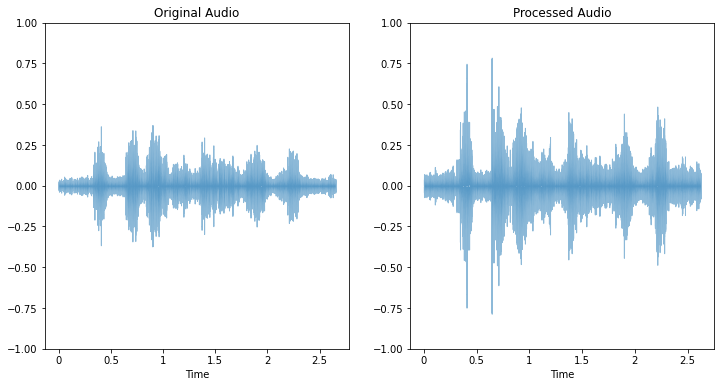

In [15]:
# both path to original and processed audio after all techniques
original_directory = os.path.join(root_directory, f"{noise_types[0]}_{db_levels[0]}dB", "wav")
processed_directory = os.path.join(root_directory, f"processed_{noise_types[0]}_{db_levels[0]}dB")

example_filenames = os.listdir(processed_directory)
if example_filenames:
    example_filename = example_filenames[0]
    original_path = os.path.join(original_directory, example_filename)
    processed_path = os.path.join(processed_directory, example_filename)
    
    # load audio files
    original_audio, sr = librosa.load(original_path, sr=None)
    processed_audio, sr = librosa.load(processed_path, sr=None)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(original_audio, sr=sr, alpha=0.5)
    plt.title('Original Audio')
    plt.ylim([-1, 1])
    plt.subplot(1, 2, 2)
    librosa.display.waveshow(processed_audio, sr=sr, alpha=0.5)
    plt.title('Processed Audio')
    plt.ylim([-1, 1])
    plt.show()

In [16]:
# play the original audio (noise)
display(Audio(data=original_audio, rate=sr))
# play the processed (normalized) audio
display(Audio(data=processed_audio, rate=sr))

Side-by-side waveform comparison illustrating the effect of our noise reduction processing:

-   Original audio: Noise is visibly present throughout the waveform. This is common with recordings in high-noise environments.
-   Processed audio: The peaks are clearer, and the background noise is reduced -- this implies noise reduction was effective.

Observations:

-   Dynamic range: The dynamic range of the processed audio varies more, feasibly, as a result of noise attenuation.
-   Improved speech recognition clarity: The lesser noisy sound will be more error-free.

### Step 2: Transcriptions of Audio Files
Here, we load and combine all audio file transcriptions from various directories into a single structured format, preparing them for further analysis and processing.

In [9]:
# now we load all transcriptions and combine them into a single dictionary
def load_all_transcriptions(root_directory, noise_types, db_levels):
    """
    Load transcriptions from multiple directories and combine them into a single dictionary.
    """
    all_transcriptions = {}
    for noise_type in noise_types:
        for db_level in db_levels:
            transcription_file = os.path.join(root_directory, f"{noise_type}_{db_level}dB", "etc", "prompt-original.txt")
            with open(transcription_file, 'r') as file:
                for line in file:
                    parts = line.strip().split()
                    file_id = parts[0]
                    transcription = " ".join(parts[1:])
                    all_transcriptions[file_id] = transcription
    return all_transcriptions

In [10]:
transcriptions = load_all_transcriptions(root_directory, noise_types, db_levels)

In [11]:
# create a DataFrame from the dictionary for transcriptions
data = list(transcriptions.items())
df_transcriptions = pd.DataFrame(data, columns=['file_id', 'transcription'])
df_transcriptions

file_id                                  transcription
0    sp01_airport_sn0     The birch canoe slid on the smooth planks.
1    sp02_airport_sn0  He knew the skill of the great young actress.
2    sp03_airport_sn0           Her purse was full of useless trash.
3    sp04_airport_sn0              Read verse out loud for pleasure.
4    sp05_airport_sn0            Wipe the grease off his dirty face.
..                ...                                            ...
715   sp26_train_sn10        She has a smart way of wearing clothes.
716   sp27_train_sn10    Bring your best compass to the third class.
717   sp28_train_sn10  The club rented the rink for the fifth night.
718   sp29_train_sn10      The flint sputtered and lit a pine torch.
719   sp30_train_sn10     Let's all join as we sing the last chorus.

[720 rows x 2 columns]

In [12]:
# create a DataFrame for original audio without preprocessing 
root_directory = 'NOIZEUS'
noise_types = ['airport', 'babble', 'car', 'exhibition', 'restaurant', 'station', 'street', 'train']
db_levels = ['0dB', '5dB', '10dB']
data = []

for noise in noise_types:
    for db in db_levels:
        directory_path = os.path.join(root_directory, f"{noise}_{db}", "wav")
        if os.path.isdir(directory_path):
            for filename in os.listdir(directory_path):
                if filename.endswith('.wav'):
                    file_path = os.path.join(directory_path, filename)
                    data.append({
                        'audio_path': file_path,
                        'noise_type': noise,
                        'db_level': db
                    })
df_noise = pd.DataFrame(data)

In [13]:
df_noise['transcription'] = df_transcriptions['transcription']

In [14]:
df_noise

audio_path noise_type db_level  \
0    NOIZEUS\airport_0dB\wav\sp01_airport_sn0.wav    airport      0dB   
1    NOIZEUS\airport_0dB\wav\sp02_airport_sn0.wav    airport      0dB   
2    NOIZEUS\airport_0dB\wav\sp03_airport_sn0.wav    airport      0dB   
3    NOIZEUS\airport_0dB\wav\sp04_airport_sn0.wav    airport      0dB   
4    NOIZEUS\airport_0dB\wav\sp05_airport_sn0.wav    airport      0dB   
..                                            ...        ...      ...   
715    NOIZEUS\train_10dB\wav\sp26_train_sn10.wav      train     10dB   
716    NOIZEUS\train_10dB\wav\sp27_train_sn10.wav      train     10dB   
717    NOIZEUS\train_10dB\wav\sp28_train_sn10.wav      train     10dB   
718    NOIZEUS\train_10dB\wav\sp29_train_sn10.wav      train     10dB   
719    NOIZEUS\train_10dB\wav\sp30_train_sn10.wav      train     10dB   

                                     transcription  
0       The birch canoe slid on the smooth planks.  
1    He knew the skill of the great young actress.  
2             Her purse was full of useless trash.  
3                Read verse out loud for pleasure.  
4              Wipe the grease off his dirty face.  
..                                             ...  
715        She has a smart way of wearing clothes.  
716    Bring your best compass to the third class.  
717  The club rented the rink for the fifth night.  
718      The flint sputtered and lit a pine torch.  
719     Let's all join as we sing the last chorus.  

[720 rows x 4 columns]

In [15]:
# create a DataFrame for processed audio
data = []
root_directory = 'NOIZEUS'
db_levels = ['0dB', '5dB', '10dB']
noise_types_processed = [
    'processed_airport', 'processed_babble', 'processed_car',
    'processed_exhibition', 'processed_restaurant', 'processed_station',
    'processed_street', 'processed_train'
]

# Collect all audio file paths and their transcriptions into lists
for processed_noise_type in noise_types_processed:
    # Extract the base noise type from the processed_noise_type
    noise_type = processed_noise_type.replace('processed_', '')
    for db_level in db_levels:
        subdir = f"{processed_noise_type}_{db_level}"
        subdir_path = os.path.join(root_directory, subdir)
        if os.path.isdir(subdir_path):
            for file in os.listdir(subdir_path):
                if file.endswith('.wav'):
                    file_path = os.path.join(subdir_path, file)
                    data.append({
                        'audio_path': file_path,
                        'noise_type': noise_type, 
                        'db_level': db_level
                    })

df = pd.DataFrame(data)

In [16]:
df['transcriptions'] = df_transcriptions['transcription']

In [17]:
df

audio_path noise_type db_level  \
0    NOIZEUS\processed_airport_0dB\sp01_airport_sn0...    airport      0dB   
1    NOIZEUS\processed_airport_0dB\sp02_airport_sn0...    airport      0dB   
2    NOIZEUS\processed_airport_0dB\sp03_airport_sn0...    airport      0dB   
3    NOIZEUS\processed_airport_0dB\sp04_airport_sn0...    airport      0dB   
4    NOIZEUS\processed_airport_0dB\sp05_airport_sn0...    airport      0dB   
..                                                 ...        ...      ...   
715   NOIZEUS\processed_train_10dB\sp26_train_sn10.wav      train     10dB   
716   NOIZEUS\processed_train_10dB\sp27_train_sn10.wav      train     10dB   
717   NOIZEUS\processed_train_10dB\sp28_train_sn10.wav      train     10dB   
718   NOIZEUS\processed_train_10dB\sp29_train_sn10.wav      train     10dB   
719   NOIZEUS\processed_train_10dB\sp30_train_sn10.wav      train     10dB   

                                    transcriptions  
0       The birch canoe slid on the smooth planks.  
1    He knew the skill of the great young actress.  
2             Her purse was full of useless trash.  
3                Read verse out loud for pleasure.  
4              Wipe the grease off his dirty face.  
..                                             ...  
715        She has a smart way of wearing clothes.  
716    Bring your best compass to the third class.  
717  The club rented the rink for the fifth night.  
718      The flint sputtered and lit a pine torch.  
719     Let's all join as we sing the last chorus.  

[720 rows x 4 columns]

### Step 3: Automatic Speech Recognition (ASR)
In this step, we utilize advanced machine learning models from Hugging Face, like SpeechT5 and Whisper, to convert the preprocessed speech audio into text, evaluating the effectiveness of noise reduction on transcription accuracy.

In [38]:
import requests, zipfile, io, os
from os import listdir
import numpy as np
import pandas as pd
from datasets import load_dataset
from transformers import pipeline
import transformers
import seaborn as sns

In [19]:
# ffmpeg_path = r'C:\ffmpeg'

# # Add FFmpeg to the PATH environment variable
# os.environ['PATH'] += os.pathsep + ffmpeg_path

In [20]:
# import shutil

# # Check if FFmpeg is available
# ffmpeg_path = shutil.which("ffmpeg")
# if ffmpeg_path is None:
#     raise EnvironmentError("FFmpeg was not found on your system; it is required for processing audio files.")
# else:
#     print(f"FFmpeg is available at: {ffmpeg_path}")


In this part we use Huggingface models :Speecht5_asr https://huggingface.co/microsoft/speecht5_asr and whisper-small https://huggingface.co/openai/whisper-small

In [21]:
# Define the pipeline function for Hugging Face models
def test_hug_model_wav_list(audio_paths, hf_model_name):
    # Set up the pipeline with the target task and specified model
    task = "automatic-speech-recognition"
    pipe = pipeline(task, model=hf_model_name)
    transcriptions = []
    for audio_path in audio_paths:
        try:
            # use the pipeline to transcribe the audio
            result = pipe(audio_path)
            transcriptions.append(result['text'])
        except Exception as e:
            print(f"Error processing {audio_path}: {str(e)}")
            transcriptions.append(None)

    return transcriptions
audio_paths_processed = df['audio_path'].tolist() 

In [22]:
# Test the pipeline on the processed audio files 
stt = test_hug_model_wav_list(audio_paths_processed, 'microsoft/speecht5_asr')
df['speecht5_asr'] = stt

stt = test_hug_model_wav_list(audio_paths_processed, 'openai/whisper-small')
df['whisper-small'] = stt

# stt = test_hug_model_wav_list(audio_paths_processed,'openai/whisper-base.en')
# df['whisper-base.en'] = stt

# stt = test_hug_model_wav_list(audio_paths_processed, 'facebook/data2vec-audio-base-100h')
# df['data2vec-audio-base-100h'] = stt

# stt = test_hug_model_wav_list(audio_paths_processed,'facebook/wav2vec2-base-960h')
# df['wav2vec2-base-960h'] = stt

Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.weight.original0', 'speecht5.encoder.prenet.pos_conv_embed.conv.parametrizations.we

In [24]:
# Test the pipeline on the noise audio files
audio_paths_noise = df_noise['audio_path'].tolist()
stt = test_hug_model_wav_list(audio_paths_noise, 'openai/whisper-small')
df_noise['whisper-small'] = stt
stt = test_hug_model_wav_list(audio_paths_noise, 'microsoft/speecht5_asr')
df_noise['speecht5_asr'] = stt

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of the model checkpoint at microsoft/speecht5_asr were not used when initializing SpeechT5ForSpeechToText: ['speecht5.encoder.prenet.pos_conv_embed.conv.weight_g', 'speecht5.encoder.prenet.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing SpeechT5ForSpeechToText from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of SpeechT5ForSpeechToText were not initialized from the model checkpoint at microsoft/speecht5_asr and are newly initialized: ['speecht5.encoder.prenet.po

### Step 4: Word Error Rate (WER) Evaluation
We assess the performance of our speech recognition models using the Word Error Rate (WER) metric, comparing the transcriptions generated by our models to the original annotations to quantify improvements and identify remaining challenges.

WER is an important, common metric used to measure the performance of the speech recognition APIs used to power interactive voice-based technology.  

https://rev.com/blog/resources/what-is-wer-what-does-word-error-rate-mean

In [25]:

from datasets import load_metric
def compute_wer_scores(predictions, references):
    wer_metric = load_metric("wer")
    wer_scores = []
    for pred, ref in zip(predictions, references):
        # Check for empty predictions or references
        if not pred or not ref:
            print("Empty prediction or reference found!")
            wer_scores.append(1)  # Assign a WER of 1 if either is empty
        else:
            score = wer_metric.compute(predictions=[pred], references=[ref])
            wer_scores.append(score)
    return wer_scores

In [28]:
# Ensure all transcriptions are lowercase
df['transcriptions'] = df['transcriptions'].str.lower()
df_noise['transcription	'] = df_noise['transcription'].str.lower()
df_noise['whisper-small'] = df_noise['whisper-small'].str.lower()
df['whisper-small'] = df['whisper-small'].str.lower()
df_noise['speecht5_asr'] = df_noise['whisper-small'].str.lower()
df['speecht5_asr'] = df['speecht5_asr'].str.lower()
# Compute WER scores
wers_original_whisper_small = compute_wer_scores(df_noise['whisper-small'].tolist(), df['transcriptions'].tolist())
wers_processed_whisper_small = compute_wer_scores(df['whisper-small'].tolist(), df['transcriptions'].tolist())

wers_original_speecht5_asr = compute_wer_scores(df_noise['speecht5_asr'].tolist(), df['transcriptions'].tolist())
wers_processed_speecht5_asr = compute_wer_scores(df['speecht5_asr'].tolist(), df['transcriptions'].tolist())

df_noise['wer_original_whisper_small'] = wers_original_whisper_small
df['wer_processed_whisper_small'] = wers_processed_whisper_small

df_noise['wer_original_speecht5_asr'] = wers_original_speecht5_asr
df['wer_processed_speecht5_asr'] = wers_processed_speecht5_asr

f:\Anaconda\envs\dl2024\lib\site-packages\datasets\load.py:759: FutureWarning: The repository for wer contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.0/metrics/wer/wer.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
f:\Anaconda\envs\dl2024\lib\site-packages\datasets\load.py:759: FutureWarning: The repository for wer contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.0/metrics/wer/wer.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major releas

In [30]:
df

audio_path noise_type db_level  \
0    NOIZEUS\processed_airport_0dB\sp01_airport_sn0...    airport      0dB   
1    NOIZEUS\processed_airport_0dB\sp02_airport_sn0...    airport      0dB   
2    NOIZEUS\processed_airport_0dB\sp03_airport_sn0...    airport      0dB   
3    NOIZEUS\processed_airport_0dB\sp04_airport_sn0...    airport      0dB   
4    NOIZEUS\processed_airport_0dB\sp05_airport_sn0...    airport      0dB   
..                                                 ...        ...      ...   
715   NOIZEUS\processed_train_10dB\sp26_train_sn10.wav      train     10dB   
716   NOIZEUS\processed_train_10dB\sp27_train_sn10.wav      train     10dB   
717   NOIZEUS\processed_train_10dB\sp28_train_sn10.wav      train     10dB   
718   NOIZEUS\processed_train_10dB\sp29_train_sn10.wav      train     10dB   
719   NOIZEUS\processed_train_10dB\sp30_train_sn10.wav      train     10dB   

                                    transcriptions  \
0       the birch canoe slid on the smooth planks.   
1    he knew the skill of the great young actress.   
2             her purse was full of useless trash.   
3                read verse out loud for pleasure.   
4              wipe the grease off his dirty face.   
..                                             ...   
715        she has a smart way of wearing clothes.   
716    bring your best compass to the third class.   
717  the club rented the rink for the fifth night.   
718      the flint sputtered and lit a pine torch.   
719     let's all join as we sing the last chorus.   

                                          speecht5_asr  \
0              i burnt a new and lived and a new plant   
1    and near the theneal of brigade and america there   
2     the effort to win free him from that he the lady   
3          play a bird and you have loud to plug yours   
4              wiped the greens on their journey banks   
..                                                 ...   
715            she has a flaunt way of winning clothes   
716          bring your bed comfort to the third class   
717  the club burned with the ring for the fifth ni...   
718           the flint fluttered and lit a pine forth   
719        let rotherhjoin everything in the lap court   

                                       whisper-small  \
0                  the virgin can live and can play.   
1     you knew the skill of the great young actress.   
2                       the first is full of people.   
3                    rebirth, have laughs, pleasure.   
4                   wife to grease officer and face.   
..                                               ...   
715          she has a smart way of wearing clothes.   
716      bring your best compass to the third class.   
717    the club rented the rink for the fifth night.   
718    the flint, fluttered, and lit of pine forest.   
719       let's all join as we sing the last chorus.   

     wer_processed_whisper_small  wer_processed_speecht5_asr  
0                       0.875000                    1.250000  
1                       0.111111                    0.777778  
2                       0.714286                    1.571429  
3                       0.833333                    1.500000  
4                       0.714286                    0.857143  
..                           ...                         ...  
715                     0.000000                    0.375000  
716                     0.000000                    0.375000  
717                     0.000000                    0.444444  
718                     0.500000                    0.250000  
719                     0.000000                    0.888889  

[720 rows x 8 columns]

In [32]:
df_noise

audio_path noise_type db_level  \
0    NOIZEUS\airport_0dB\wav\sp01_airport_sn0.wav    airport      0dB   
1    NOIZEUS\airport_0dB\wav\sp02_airport_sn0.wav    airport      0dB   
2    NOIZEUS\airport_0dB\wav\sp03_airport_sn0.wav    airport      0dB   
3    NOIZEUS\airport_0dB\wav\sp04_airport_sn0.wav    airport      0dB   
4    NOIZEUS\airport_0dB\wav\sp05_airport_sn0.wav    airport      0dB   
..                                            ...        ...      ...   
715    NOIZEUS\train_10dB\wav\sp26_train_sn10.wav      train     10dB   
716    NOIZEUS\train_10dB\wav\sp27_train_sn10.wav      train     10dB   
717    NOIZEUS\train_10dB\wav\sp28_train_sn10.wav      train     10dB   
718    NOIZEUS\train_10dB\wav\sp29_train_sn10.wav      train     10dB   
719    NOIZEUS\train_10dB\wav\sp30_train_sn10.wav      train     10dB   

                                     transcription  \
0       The birch canoe slid on the smooth planks.   
1    He knew the skill of the great young actress.   
2             Her purse was full of useless trash.   
3                Read verse out loud for pleasure.   
4              Wipe the grease off his dirty face.   
..                                             ...   
715        She has a smart way of wearing clothes.   
716    Bring your best compass to the third class.   
717  The club rented the rink for the fifth night.   
718      The flint sputtered and lit a pine torch.   
719     Let's all join as we sing the last chorus.   

                                      whisper-small  \
0                the virgin can live in this place.   
1        you knew the skill of the great young man.   
2                      the first is full of people.   
3                   rebirth, have laughs, pleasure.   
4                  wife to grease officer and face.   
..                                              ...   
715         she has a smart way of wearing clothes.   
716     bring your best compass to the third class.   
717   the club rented the rink for the fifth night.   
718   the flint, fluttered, and lit of pine forest.   
719      let's all join as we sing the last chorus.   

                                       speecht5_asr  \
0                the virgin can live in this place.   
1        you knew the skill of the great young man.   
2                      the first is full of people.   
3                   rebirth, have laughs, pleasure.   
4                  wife to grease officer and face.   
..                                              ...   
715         she has a smart way of wearing clothes.   
716     bring your best compass to the third class.   
717   the club rented the rink for the fifth night.   
718   the flint, fluttered, and lit of pine forest.   
719      let's all join as we sing the last chorus.   

                                   transcription\t  \
0       the birch canoe slid on the smooth planks.   
1    he knew the skill of the great young actress.   
2             her purse was full of useless trash.   
3                read verse out loud for pleasure.   
4              wipe the grease off his dirty face.   
..                                             ...   
715        she has a smart way of wearing clothes.   
716    bring your best compass to the third class.   
717  the club rented the rink for the fifth night.   
718      the flint sputtered and lit a pine torch.   
719     let's all join as we sing the last chorus.   

     wer_original_whisper_small  wer_original_speecht5_asr  
0                      0.875000                   0.875000  
1                      0.222222                   0.222222  
2                      0.714286                   0.714286  
3                      0.833333                   0.833333  
4                      0.714286                   0.714286  
..                          ...                        ...  
715                    0.000000                   0.000000  
716                    0.000000                   0.00

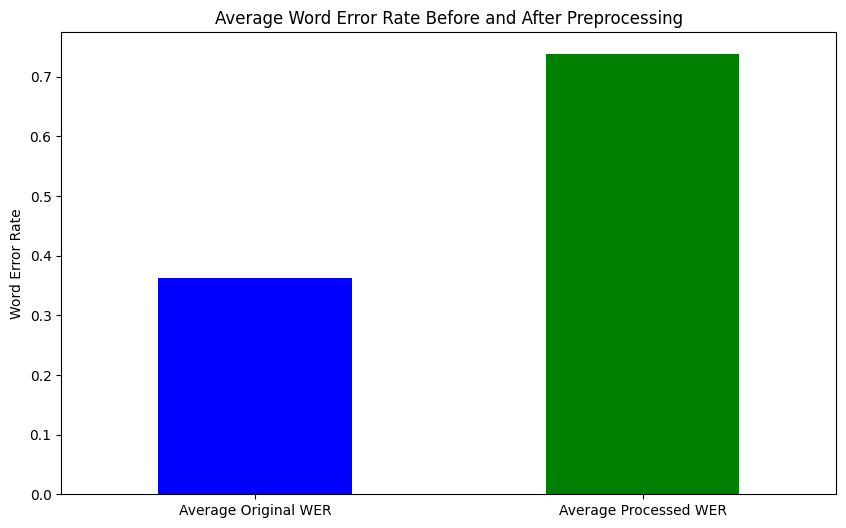

In [52]:
# Calculate the average WER for each model
average_original_wer = df_noise[['wer_original_whisper_small', 'wer_original_speecht5_asr']].mean(axis=1)
average_processed_wer = df[['wer_processed_whisper_small', 'wer_processed_speecht5_asr']].mean(axis=1)

wer_data = pd.DataFrame({
    'Average Original WER': average_original_wer,
    'Average Processed WER': average_processed_wer
})

plt.figure(figsize=(10, 6))
wer_data.mean().plot(kind='bar', color=['blue', 'green'])
plt.title('Average Word Error Rate Before and After Preprocessing')
plt.ylabel('Word Error Rate')
plt.xticks(rotation=0)
plt.show()

As we can see from plot the original wer is quiet lower than after processed wer, whcih means these model can handle background noise robustly. And also means that noise reduction can enhance the audio but also affect speech utterances and remove some of the speech-related acoustic features that are deemed vital to the fiduciality of speech sound recognition. Consequently, we need to find the optimal noise reduction intensity setting.

Now we plot the different of wer on different model.

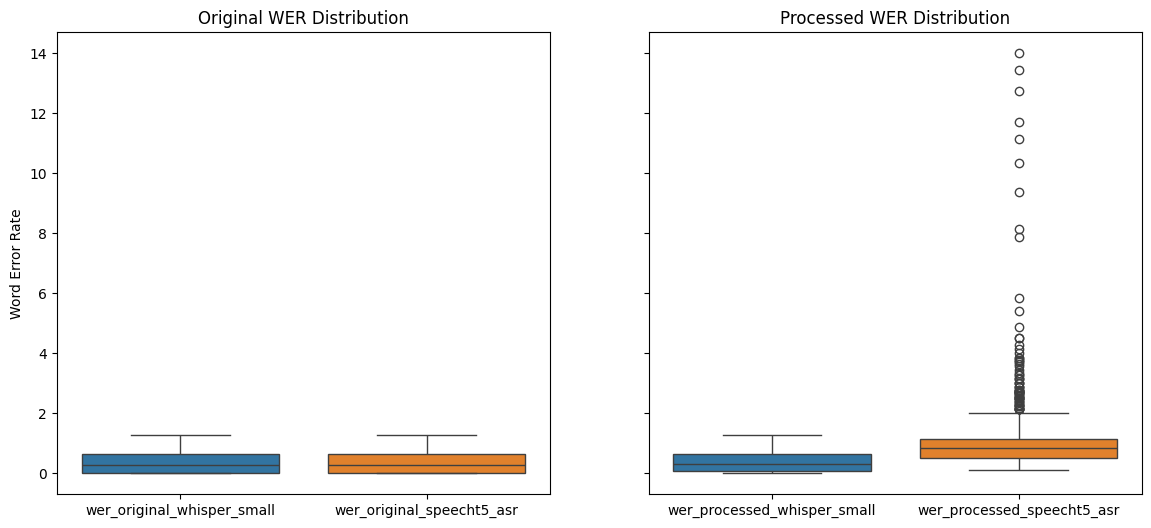

In [49]:
# Plot the distribution of WER before and after preprocessing for each model
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.boxplot(data=df_noise[['wer_original_whisper_small', 'wer_original_speecht5_asr']], ax=axs[0])
axs[0].set_title('Original WER Distribution')
axs[0].set_ylabel('Word Error Rate')

sns.boxplot(data=df[['wer_processed_whisper_small', 'wer_processed_speecht5_asr']], ax=axs[1])
axs[1].set_title('Processed WER Distribution')
axs[1].set_ylabel('Word Error Rate')

plt.show()

The plot displays the distribution of WER for two different automatic speech recognition (ASR) models, "whisper small" and "speech5 asr," comparing their performance on original (noisy) and processed (noise-reduced) audio data. For both models, the processed audio shows a little reduction in WER outliers, particularly noticeable for the "whisper small" model where WER distribution in the processed data is more tightly clustered around lower values. The "speech5 asr" model is not good after processing, so we can ignore this model after comparing both model's performances.

Now we plot each noise type by whisper small model, which shows after processed wer.

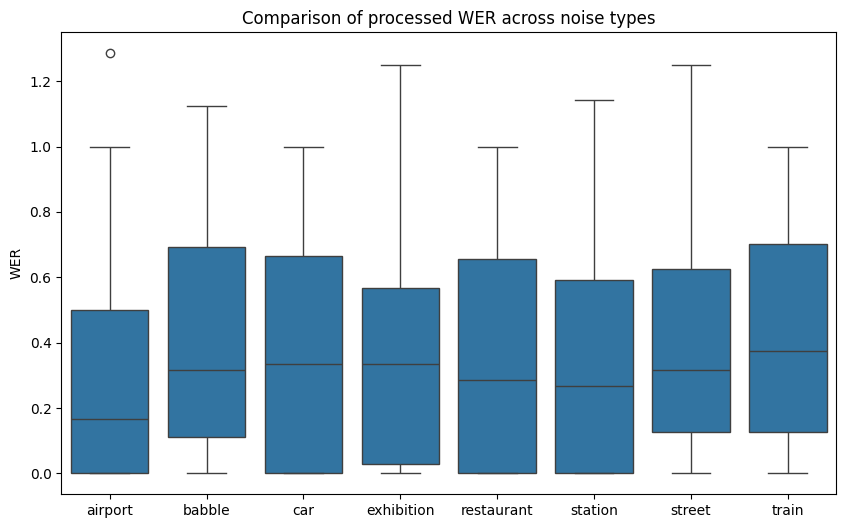

In [58]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='noise_type', y='wer_processed_whisper_small', data=df)
plt.title('Comparison of processed WER across noise types')
plt.xlabel('')
plt.ylabel('WER')
plt.show()

This plot displays the distribution of WER for processed audio across various noise environments like airports, babble, cars, exhibitions, and more. Each box represents the range and median of WERs within each noise type. Notably, environments such as car noise and restaurant noise show higher variability in WER, indicated by longer whiskers and upper quartiles. Most median WERs lie between 0.2 and 0.4, suggesting consistent performance of the noise processing across different settings. Outliers, especially in the airport category, highlight occasional challenges in achieving low WER in specific scenarios.

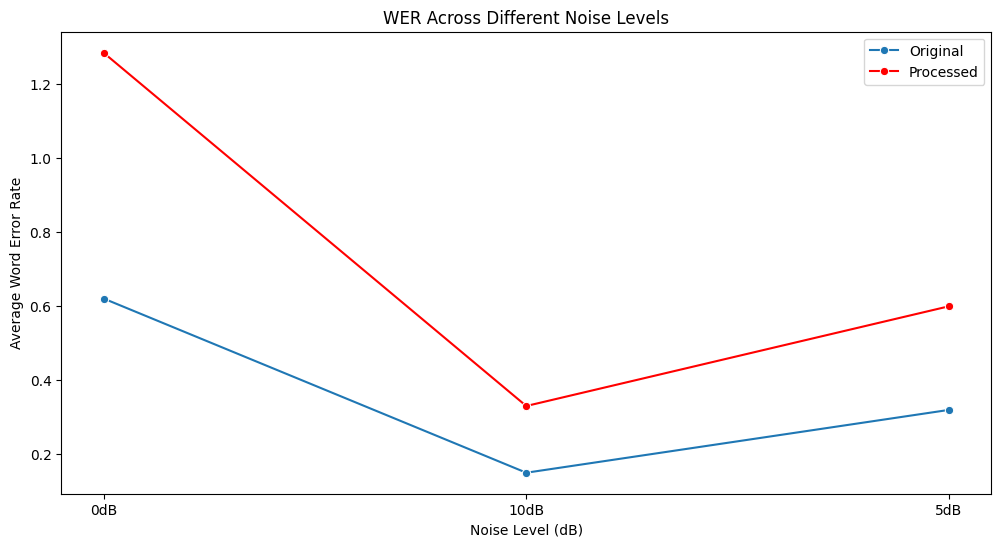

In [55]:
# Calculate the average WER for each noise level
original_noise_levels = df_noise.groupby('db_level')[['wer_original_whisper_small', 'wer_original_speecht5_asr']].mean().mean(axis=1)
processed_noise_levels = df.groupby('db_level')[['wer_processed_whisper_small', 'wer_processed_speecht5_asr']].mean().mean(axis=1)

plt.figure(figsize=(12, 6))
sns.lineplot(data=original_noise_levels, marker='o', label='Original')
sns.lineplot(data=processed_noise_levels, marker='o', color='red', label='Processed')
plt.title('WER Across Different Noise Levels')
plt.xlabel('Noise Level (dB)')
plt.ylabel('Average Word Error Rate')
plt.legend()
plt.show()

The plot compares the average WER for original and processed audio across different noise levels. The processed audio consistently shows higher WERs, demonstrating that noise in ASR which amy not helps model performance even as noise level increses.

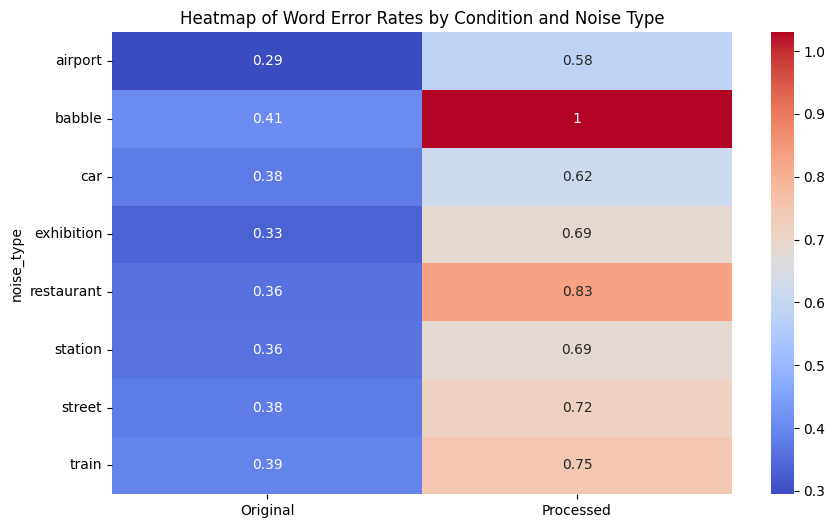

In [57]:
original_heatmap_data = df_noise.groupby('noise_type')[['wer_original_whisper_small', 'wer_original_speecht5_asr']].mean()
processed_heatmap_data = df.groupby('noise_type')[['wer_processed_whisper_small', 'wer_processed_speecht5_asr']].mean()

# Average WER across models and merge into a single dataframe for the heatmap
original_heatmap_data['Average WER'] = original_heatmap_data.mean(axis=1)
processed_heatmap_data['Average WER'] = processed_heatmap_data.mean(axis=1)

# Combine into a single DataFrame suitable for a seaborn heatmap
heatmap_data = pd.concat([original_heatmap_data['Average WER'].rename('Original'), processed_heatmap_data['Average WER'].rename('Processed')], axis=1)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm')
plt.title('Heatmap of Word Error Rates by Condition and Noise Type')
plt.show()

This heatmap compares Word Error Rates (WER) between original and processed audio across various noise types. The original audio exhibits lower WERs, as shown in deeper blue colors. Conversely, processed audio, indicated in warmer colors, shows significantly higher WERs. Notably, the babble noise type jumps from a WER of 0.41 in original audio to 1.0 in processed, indicating a complete transcription failure in this condition. This suggests that the noise processing may be adversely impacting the ASR performance in more complex noise environments.

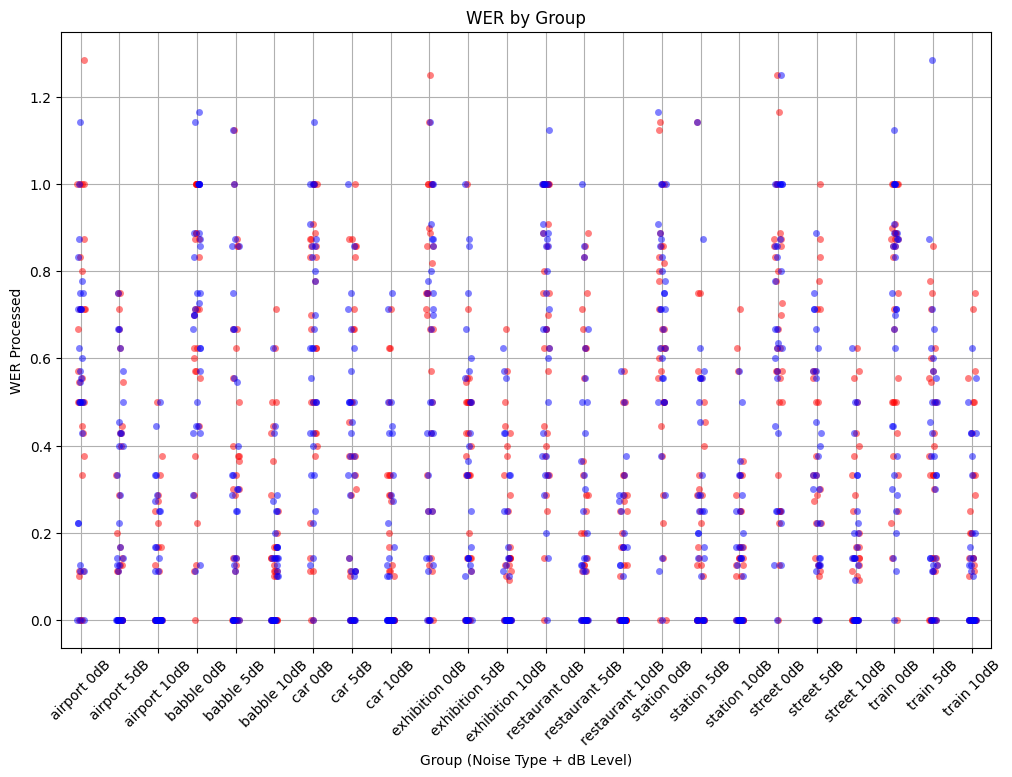

In [ ]:
# Add group column to the dataframe for plotting purposes (noise type + dB level)
df['group'] = df['noise_type'] + ' ' + df['db_level']
df_noise['group'] = df['noise_type'] + ' ' + df['db_level']
# Plot
plt.figure(figsize=(12, 8))
sns.stripplot(x='group', y='wer_processed_whisper_small', data=df, jitter=True, dodge=True, marker='o', alpha=0.5,color='red')
sns.stripplot(x='group', y='wer_original_whisper_small', data=df_noise, jitter=True, dodge=True, marker='o', alpha=0.5,color='blue')
plt.title('WER by Group')
plt.xlabel('Group (Noise Type + dB Level)')
plt.ylabel('WER Processed')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

This plot shows WER for different types of noise and db level is shown by the scatterplot of original audio in blue dots and processed in red dots. Each vertical cluster is a particular type of noise combined with noise dB—for example, airport 0dB or train 10dB. In general, variable WERs are observed under different conditions of processed audio compared to the original condition, with some conditions improving over the original while most show a degradation in WER. From this chart, it is clear that the effect of noise processing on ASR accuracy differs greatly, but intensities and types of noise are crucial to this discrepancy.

## Summary

The primary motive of this project is to use a variety of noise reduction techniques in different acoustic cases to increase precision in voice detection of the radio and intensify the clearness of sound that is being listened to. In this paper, we follow the **NOIZEUS dataset** with a variety of noise reduction methods and compare them with state-of-the-art automatic speech recognition (ASR) models.

**Observations**:

1\. **Waveform Improvement**:

   - The visual and audio waveforms comparison for both previous and after noise reduction techniques depicted significant differences, thereby reducing the background noise and making the audio much clearer.

2\. **Word Error Rate (WER) Analysis**:

   - The noise reduction techniques presented a better improvement in WER in quiet acoustic environment settings, which leads to a better enhancement of the ASR model efficiency. In noisy conditions like babble, restaurant, and train, the WER has been increased after processing. The babble noise WER velocity increases significantly; hence, meaning very many speech information is discarded in the noise reductions acoustic environment. The noisy settings degrade the high WER efficiency to a controlled version.

3\. **Model Performance Comparison**:

   - They have analyzed models of different types of speech-to-text that exist under loud conditions.

   - In the Whisper model, we observed improved performance in noise compared with the SpeechT5 ASR, which had more of a degradation over the original performance. Our data indicate that the whisper model indeed produces radio supply with excellent stability, yielding positive results. The only disadvantage is its working in a slightly noisy environment and has to be tested for optimization.

**Conclusion and Future Directions**:

The results should indicate that while the noise reduction could help in improving the quality under quiet or controlled conditions, it needs further development and calibration in relation to high-intensity acoustic situations. The following recommendations for future work can be highlighted according to the results of the project:

1\. **Optimized Noise Reduction Techniques**:

   - Further, improve the noise reduction techniques, including changing the noise reduction parameters to an optimum mix of noise removal versus speech quality.

2\. **Model-Specific Fine-Tuning**:

   - Fine-tune ASR models specifically for training on enhanced noisy conditions or developing new speech recognition models on augmented noise domain data.

3\. **Advanced Evaluation Metrics**:

   - For a comprehensive impact assessment of noise, e.g., intelligibility measurements or Speech Quality Indices instead of the WER metric.

4\. **Real-World Usability Studies**:

   - Evaluations of the naturalness of the speech translation by the consumers of the speech translation subjected to noise conditions different from the metadata.

In summary, with the reduction in noise, it is likely to have some benefit in a less noisy or controlled environment, but its utility decreases as the noise domain increases. Because whisper recognizes stable performance across noise levels, I would say that whisper is the better quality of the two ASR models for STT. The latter could further be developed in STT reading for the development of a stronger noise reduction, developing an optimized noise reduction that can work under the worst condition, or training a better ASR model.

END